In [18]:
import mine_torch
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils import data
from torch import nn

In [19]:

num_input=28*28
num_hidden=256
num_output=10
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(
    root="./data", train=False, transform=trans, download=True)

In [20]:
#隐藏层
W1=torch.normal(0,0.01,size=(num_input,num_hidden),requires_grad=True)
b1=torch.zeros(num_hidden,requires_grad=True)

#输出层
W2=torch.normal(0,0.01,size=(num_hidden,num_output),requires_grad=True)
b2=torch.zeros(num_output,requires_grad=True)
#不能使用randn来初始化,e^200太大了

params=[W1,b1,W2,b2]

In [21]:
# 对矩阵的ReLU函数
def ReLU(X):
    a=torch.zeros_like(X)
    return torch.max(a,X)

In [22]:
#@为矩阵乘法(torch.mm),*为点乘
def net(X):
    # X=X.reshape(-1,num_input)
    H=ReLU(X@W1+b1)
    return H@W2+b2

mygpu = torch.device('cuda')
for param in params:
    param=param


In [23]:
epochs=10
lr=0.6
X=mine_torch.my_reshape(mnist_train,num_input)
y=torch.tensor([i[1] for i in mnist_train])

loss_list=[]
acc_list=[]

def net(X):
    # X=X.reshape(-1,num_input)
    H=ReLU(X@W1+b1)
    return mine_torch.softmax(H@W2+b2)

mine_torch.mine_SGD([W1,b1,W2,b2],lr,mine_torch.cross_entropy,epochs,X,y,net,loss_list,acc_list)

epoch 1, loss 2.301951
epoch 2, loss 2.287735
epoch 3, loss 2.271184
epoch 4, loss 2.247899
epoch 5, loss 2.213721
epoch 6, loss 2.163890
epoch 7, loss 2.093113
epoch 8, loss 1.996882
epoch 9, loss 1.873359
epoch 10, loss 1.725708


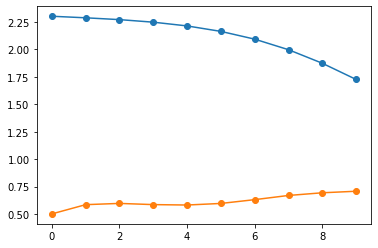

In [24]:
fig,ax=plt.subplots()
ax.scatter(range(int(epochs)),loss_list)
ax.plot(range(int(epochs)),loss_list)
ax.scatter(range(int(epochs)),acc_list)
ax.plot(range(int(epochs)),acc_list)


In [25]:
for i in range(50):
    print(f'predict:{net(X)[i].argmax()} real:{y[i]}')

predict:3 real:5
predict:0 real:0
predict:4 real:4
predict:1 real:1
predict:9 real:9
predict:2 real:2
predict:1 real:1
predict:3 real:3
predict:1 real:1
predict:4 real:4
predict:3 real:3
predict:1 real:5
predict:3 real:3
predict:6 real:6
predict:1 real:1
predict:7 real:7
predict:2 real:2
predict:8 real:8
predict:6 real:6
predict:7 real:9
predict:4 real:4
predict:0 real:0
predict:9 real:9
predict:1 real:1
predict:2 real:1
predict:3 real:2
predict:9 real:4
predict:3 real:3
predict:7 real:2
predict:1 real:7
predict:3 real:3
predict:1 real:8
predict:6 real:6
predict:7 real:9
predict:0 real:0
predict:1 real:5
predict:6 real:6
predict:0 real:0
predict:7 real:7
predict:6 real:6
predict:1 real:1
predict:8 real:8
predict:7 real:7
predict:7 real:9
predict:3 real:3
predict:9 real:9
predict:8 real:8
predict:8 real:5
predict:3 real:9
predict:3 real:3


In [26]:
mine_torch.calc_acc(X,y,net)

0.70705

In [32]:
X=X.cuda(mygpu)
y=y.cuda(mygpu)
X.device

device(type='cuda', index=0)

In [33]:
#利用API
epochs=10
train_iter=data.DataLoader(mnist_train,256,True)
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.Dropout(0.8),nn.ReLU(),nn.Linear(256,256),nn.ReLU(),nn.Linear(256,10))

net.apply(mine_torch.init_normal)
net.to(mygpu)
loss=nn.CrossEntropyLoss()

trainer=torch.optim.SGD(net.parameters(),lr=0.1)
for epoch in range(epochs):
    for Xi, yi in train_iter:#迭代器每次返回X和y
        Xi=Xi.to(mygpu)
        yi=yi.to(mygpu)#放在gpu上训练
        
        l = loss(net(Xi) ,yi)
        trainer.zero_grad()#清零梯度
        l.backward()
        trainer.step()#自动前进
    l = loss(net(X), y)#每轮再计算loss
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 1.920512
epoch 2, loss 0.723877
epoch 3, loss 0.516867
epoch 4, loss 0.433449
epoch 5, loss 0.396323
epoch 6, loss 0.357790
epoch 7, loss 0.331620
epoch 8, loss 0.305136
epoch 9, loss 0.289242
epoch 10, loss 0.285513


In [ ]:
mine_torch.calc_acc(X,y,net)

0.9479166666666666

In [ ]:
X_test=mine_torch.my_reshape(mnist_test,num_input)
y_test=torch.tensor([i[1] for i in mnist_test])

mine_torch.calc_acc(X_test,y_test,net)

0.9104

In [ ]:
mine_torch.see_example(X_test,y_test,net)

predict:7 real:7
predict:6 real:2
predict:1 real:1
predict:0 real:0
predict:4 real:4
predict:1 real:1
predict:4 real:4
predict:9 real:9
predict:6 real:5
predict:9 real:9
predict:0 real:0
predict:6 real:6
predict:9 real:9
predict:0 real:0
predict:1 real:1
predict:5 real:5
predict:9 real:9
predict:7 real:7
predict:3 real:3
predict:4 real:4
predict:9 real:9
predict:6 real:6
predict:6 real:6
predict:5 real:5
predict:4 real:4
predict:0 real:0
predict:7 real:7
predict:4 real:4
predict:0 real:0
predict:1 real:1
predict:3 real:3
predict:1 real:1
predict:3 real:3
predict:6 real:4
predict:7 real:7
predict:2 real:2
predict:7 real:7
predict:1 real:1
predict:2 real:2
predict:1 real:1
predict:1 real:1
predict:7 real:7
predict:4 real:4
predict:1 real:2
predict:3 real:3
predict:5 real:5
predict:1 real:1
predict:2 real:2
predict:4 real:4
predict:4 real:4
